In [1]:
import os
import math
import numpy as np
import seaborn as sb
import pandas as pd
from pprint import pprint
from matplotlib import pyplot as plt
from matplotlib import style
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn import grid_search
from sklearn import metrics
import seaborn as sns
import scipy.stats as sps

C:\Users\alex\Anaconda33\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\alex\Anaconda33\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
os.chdir("C:\\Users\\alex\\Downloads")
att_names = ['Day','Average Temperature','Maximum temperature','Minimum temperature','Atmospheric pressure at sea level','Average relative humidity','Total rainfall and / or snowmelt','Average visibility','Average wind speed','Maximum sustained wind speed','Output']      
data = pd.read_csv("WeatherDataset.csv", header=0, usecols=(0,1,2,3,4,5,6,7,8,9,11), na_values = '-')

In [3]:
data.describe()

,Average Temperature,Maximum temperature,Minimum temperature,Atmospheric pressure at sea level,Average relative humidity,Total rainfall and / or snowmelt,Average visibility,Average wind speed,Maximum sustained wind speed,Output
count,1092.000000,1092.000000,1092.000000,1092.000000,1086.000000,1092.000000,1091.000000,1085.000000,1085.000000,1064.000000
mean,12.776740,18.133883,7.894780,1017.039927,76.065378,2.025815,15.398808,8.975945,14.355392,13.638913
std,8.168039,9.527193,6.986138,7.429307,13.454767,7.009103,5.353849,4.720021,7.374556,27.899719
min,-9.200000,-5.600000,-15.700000,982.800000,44.000000,0.000000,0.200000,1.300000,3.500000,-4.994962
25%,6.000000,10.700000,2.100000,1012.500000,65.000000,0.000000,11.300000,5.900000,10.700000,-1.319391
50%,13.300000,18.850000,8.100000,1016.600000,77.000000,0.000000,17.500000,7.600000,10.700000,2.116663
75%,19.400000,25.700000,13.800000,1021.100000,87.000000,0.760000,20.000000,10.700000,18.000000,8.503035
max,29.600000,38.200000,21.700000,1040.600000,100.000000,121.920000,25.600000,41.300000,50.400000,102.687388


In [4]:
data['Year']=[d.split('/')[2] for d in data.Day]
data['Month']=[d.split('/')[0] for d in data.Day]
data['Day']=[d.split('/')[1] for d in data.Day]

In [5]:
data['Year']=data.Year.astype(int)
data['Day']=data.Day.astype(int)
data['Month']=data.Month.astype(int)

In [6]:
att_names.remove('Output')
nan_rows = []
j=0
for i in range(len(data)):
    if pd.isnull(data[att_names].values[i]).any():
        nan_rows.append(i)
        j=j+1
print("Number of rows with nan values:", j)

Number of rows with nan values: 16


In [7]:
print(nan_rows)

[76, 83, 270, 343, 347, 435, 558, 729, 774, 972, 973, 975, 1070, 1084, 1091, 1094]


In [8]:
nan_out = []
j=0
for i in range(len(data)):
    if pd.isnull(data['Output'][i]):
        nan_out.append(i)
        j=j+1
print("Number of rows with nan values in Output:", j)

Number of rows with nan values in Output: 31


In [9]:
print(nan_out)

[10, 11, 12, 13, 14, 15, 16, 159, 160, 161, 258, 259, 260, 261, 262, 470, 471, 472, 473, 474, 722, 723, 724, 725, 726, 923, 924, 925, 1084, 1085, 1086]


In [10]:
data['Output']=data['Output'].interpolate(method='index')

In [11]:
for i in att_names:
    data[i]=data[i].interpolate(method='index')

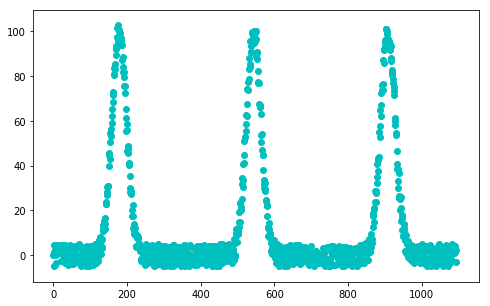

In [12]:
plt.figure(figsize=(8,5))
for i in range(len(data)):
    plt.scatter(i, data['Output'][i],c='c')
plt.show()

In [13]:
data = data.reindex_axis(['Day','Month','Year','Average Temperature','Maximum temperature','Minimum temperature','Atmospheric pressure at sea level','Average relative humidity','Average visibility','Average wind speed','Maximum sustained wind speed','Total rainfall and / or snowmelt','Output'], axis=1)

In [14]:
data.head(5)

,Day,Month,Year,Average Temperature,Maximum temperature,Minimum temperature,Atmospheric pressure at sea level,Average relative humidity,Average visibility,Average wind speed,Maximum sustained wind speed,Total rainfall and / or snowmelt,Output
0,1,1,2013,-2.8,-0.9,-4.0,1021.1,98.0,0.5,5.0,10.7,0.0,0.236121
1,2,1,2013,-1.2,5.0,-5.0,1024.2,95.0,2.6,3.1,7.2,0.0,1.675782
2,3,1,2013,3.3,8.2,-0.2,1033.7,87.0,9.2,6.3,10.7,0.0,-4.666976
3,4,1,2013,6.7,11.4,2.5,1026.0,81.0,16.3,16.7,28.7,0.0,4.681663
4,5,1,2013,6.2,9.6,2.5,1017.5,91.0,16.3,16.1,25.2,3.3,-4.167753


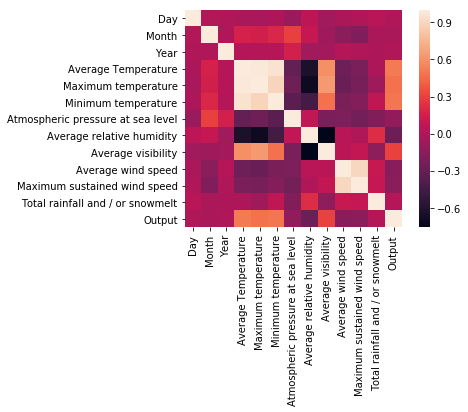

In [15]:
corrmat = data.corr()
sb.heatmap(corrmat, square=True)
plt.show()

In [16]:
X = data.drop('Output', axis = 1)
y = np.array(data['Output'])
X_att = list(X.columns)
X = np.array(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [17]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (876, 12)
Training Labels Shape: (876,)
Testing Features Shape: (219, 12)
Testing Labels Shape: (219,)


In [18]:
rf = RandomForestRegressor(bootstrap=False,n_estimators = 50,min_samples_leaf=5)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [19]:
y_pred = rf.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

Mean Absolute Error: 3.78482979047
Mean Squared Error: 42.8134606302
Root Mean Squared Error: 6.54319957132


In [20]:
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 5)) for feature, importance in zip(X_att, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:35} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: Month                               Importance: 0.55697
Variable: Minimum temperature                 Importance: 0.3204
Variable: Day                                 Importance: 0.11529
Variable: Average Temperature                 Importance: 0.003
Variable: Atmospheric pressure at sea level   Importance: 0.00145
Variable: Average relative humidity           Importance: 0.00085
Variable: Average visibility                  Importance: 0.00061
Variable: Average wind speed                  Importance: 0.00054
Variable: Total rainfall and / or snowmelt    Importance: 0.0003
Variable: Maximum temperature                 Importance: 0.00021
Variable: Year                                Importance: 0.00019
Variable: Maximum sustained wind speed        Importance: 0.00019


[None, None, None, None, None, None, None, None, None, None, None, None]

In [21]:
feature_imp = pd.Series(rf.feature_importances_,index=X_att).sort_values(ascending=False)
feature_imp

Month                                0.556965
Minimum temperature                  0.320405
Day                                  0.115285
Average Temperature                  0.003002
Atmospheric pressure at sea level    0.001450
Average relative humidity            0.000848
Average visibility                   0.000615
Average wind speed                   0.000537
Total rainfall and / or snowmelt     0.000304
Maximum temperature                  0.000207
Year                                 0.000194
Maximum sustained wind speed         0.000188
dtype: float64

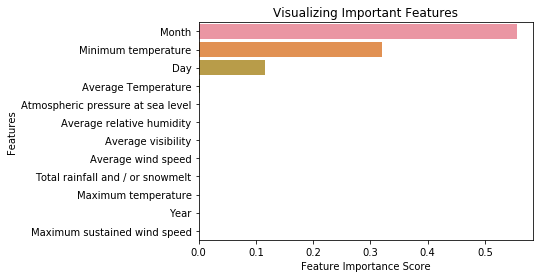

In [22]:
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [23]:
d=data[:-1]
mean_data = np.mean(d)
mean_data

Day                                    15.706581
Month                                   6.521024
Year                                 2013.999086
Average Temperature                    12.763574
Maximum temperature                    18.120521
Minimum temperature                     7.881444
Atmospheric pressure at sea level    1017.049817
Average relative humidity              76.115631
Average visibility                     15.385878
Average wind speed                      8.960420
Maximum sustained wind speed           14.325868
Total rainfall and / or snowmelt        2.030005
Output                                 13.669910
dtype: float64

In [24]:
data1= data[['Day','Month','Average Temperature','Atmospheric pressure at sea level','Minimum temperature','Output']]
#data=data1

In [25]:
def CART(data,originaldata,features,min_instances,target_attribute_name,parent_mean = None):
    
    if len(data) <= int(min_instances):
        return np.mean(data[target_attribute_name])
    
    elif (len(data)==0):
        return np.mean(originaldata[target_attribute_name])
    
    elif len(features)==0:
        return parent_mean
    
    else:
        parent_mean = np.mean(data[target_attribute_name])
        
        features_tree = np.array(features)
            
        root_feature = np.random.choice(features_tree, 1)[0]
        
        value = np.median(data[root_feature])
  
        tree = {root_feature:{}}
        
        features = [i for i in features if i != root_feature]
        
        sub_data1 = data.where(data[root_feature] <= value).dropna()
        subtree1 = CART(sub_data1,originaldata,features,min_instances,'Output',parent_mean=parent_mean)
        tree[root_feature][0] = subtree1
        
        sub_data2 = data.where(data[root_feature] >= value).dropna()
        subtree2 = CART(sub_data2,originaldata,features,min_instances,'Output',parent_mean=parent_mean)
        tree[root_feature][1] = subtree2
            
        return tree   

In [26]:
def predict(query,tree,default = mean_data):
    for key in list(query.keys()):
        if key in list(tree.keys()):
            if (query[key]<=np.median(data[key])):
                result = tree[key][0]
            else:
                result = tree[key][1]
            if isinstance(result,dict):
                return predict(query,result)
            else:
                return result 

In [27]:
def train_test_split(dataset):
    training_data = dataset.iloc[:int(0.75*len(dataset))].reset_index(drop=True)
    testing_data = dataset.iloc[int(0.75*len(dataset)):].reset_index(drop=True)
    return training_data,testing_data

In [28]:
data = data.sample(frac=1,replace=True)

In [29]:
training_data = train_test_split(data)[0]
testing_data = train_test_split(data)[1] 

In [30]:
def test(data,tree):
    queries = data.iloc[:,:-1].to_dict(orient = "records")
    predicted = []
    for i in range(len(data)):
        predicted.append(predict(queries[i],tree,mean_data))
    MSE_tree = np.sum(((data.iloc[:,-1]-predicted)**2)/len(data))
    return MSE_tree

In [31]:
tree = CART(training_data,training_data,training_data.columns.drop('Output'),8,'Output')
print('Mean square error (MSE): ',test(testing_data,tree))

Mean square error (MSE):  734.0355298131933


In [32]:
pprint(tree)

{'Year': {0: {'Month': {0: {'Average relative humidity': {0: {'Maximum temperature': {0: {'Average Temperature': {0: {'Maximum sustained wind speed': {0: {'Atmospheric pressure at sea level': {0: {'Total rainfall and / or snowmelt': {0: {'Average wind speed': {0: -0.5856598431666667,
                                                                                                                                                                                                                                                                     1: 1.0703355381666666}},
                                                                                                                                                                                                                                          1: {'Day': {0: {'Average visibility': {0: {'Minimum temperature': {0: -2.4433610682857143,
                                                                                                        

                                                                                                                                                                                                                                                                                1: -2.172210321017857}}}}}}}}}},
                                                                                                                                1: {'Average wind speed': {0: {'Total rainfall and / or snowmelt': {0: {'Minimum temperature': {0: -0.7764196271428574,
                                                                                                                                                                                                                                1: 11.413302389428571}},
                                                                                                                                                                                                    1:

                                                                                           1: {'Average Temperature': {0: {'Atmospheric pressure at sea level': {0: {'Maximum temperature': {0: 57.716581875875,
                                                                                                                                                                                             1: {'Average wind speed': {0: 26.8573125834,
                                                                                                                                                                                                                        1: 69.25239782514286}}}},
                                                                                                                                                                 1: {'Average wind speed': {0: 57.722293153875,
                                                                                                           

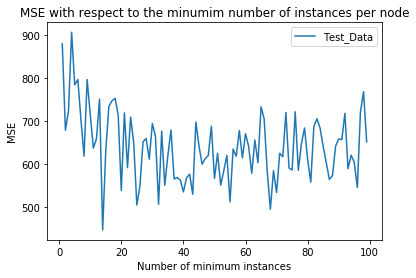

In [33]:
fig = plt.figure()
ax0 = fig.add_subplot(111) 
MSE_test = []
for i in range(1,100):
    tree = CART(training_data,training_data,training_data.columns.drop('Output'),i,'Output')
    MSE_test.append(test(testing_data,tree)) 
min_ins = np.argmin(MSE_test)
ax0.plot(range(1,100),MSE_test,label='Test_Data')
ax0.legend()
ax0.set_title('MSE with respect to the minumim number of instances per node')
ax0.set_xlabel('Number of minimum instances')
ax0.set_ylabel('MSE')
plt.show()

In [34]:
print(min_ins+1)
for i in range(len(data)):
    x=predict(data.iloc[i,:-1].to_dict(),tree)

14


In [35]:
def RandomForest_Train(dataset,number_of_Trees):
    
    random_forest_sub_tree = []
    
    for i in range(number_of_Trees):
    
        bootstrap_sample = dataset.sample(frac=1,replace=True)
        
        bootstrap_training_data = train_test_split(bootstrap_sample)[0]
        bootstrap_testing_data = train_test_split(bootstrap_sample)[1] 
        
        random_forest_sub_tree.append(CART(bootstrap_training_data,bootstrap_training_data,bootstrap_training_data.columns.drop('Output'),8,'Output'))
        
    return random_forest_sub_tree      

In [36]:
random_forest = RandomForest_Train(data,10)
random_forest

[{'Average wind speed': {0: {'Maximum sustained wind speed': {0: {'Day': {0: {'Maximum temperature': {0: {'Atmospheric pressure at sea level': {0: {'Average relative humidity': {0: {'Year': {0: {'Month': {0: {'Total rainfall and / or snowmelt': {0: {'Average Temperature': {0: {'Average visibility': {0: -3.605394403999999,
                       1: {'Minimum temperature': {0: -3.3646895391249996,
                         1: -3.7709129390909086}}}},
                     1: -3.605394403999999}},
                   1: {'Minimum temperature': {0: -3.3646895391249996,
                     1: {'Average Temperature': {0: {'Average visibility': {0: -3.605394403999999,
                         1: -3.9800286844999997}},
                       1: -3.605394403999999}}}}}},
                 1: {'Average visibility': {0: {'Minimum temperature': {0: -3.605394403999999,
                     1: {'Total rainfall and / or snowmelt': {0: {'Average Temperature': {0: -3.605394403999999,
                     

In [37]:
def RandomForest_Predict(query,random_forest,default='p'):
    predictions = []
    for tree in random_forest:
        predictions.append(predict(query,tree,default='p'))
    pred = np.mean(predictions)
    return pred

In [38]:
query = testing_data.iloc[70,:].drop('Output').to_dict()

query_target = testing_data.iloc[70,5]
print('target: ',query_target)

prediction = RandomForest_Predict(query,random_forest)
print('prediction: ',prediction)

target:  9.3
prediction:  37.8704363288


In [39]:
def RandomForest_Test(data,random_forest,default='p'):
    predictions = []
    for i in range(len(data)):
        query = data.iloc[i,:-1]
        p = RandomForest_Predict(query,random_forest,default='p')
        predictions.append(p)
    return predictions

In [40]:
accuracy = []
for i in range(1,11,1):
    random_forest = RandomForest_Train(testing_data,i)
    MSE = np.sum(((testing_data.iloc[:,-1]-RandomForest_Test(testing_data,random_forest,default='p'))**2)/len(testing_data.iloc[:,-1]))
    accuracy.append(MSE)
for i in range(10,110,10):
    random_forest = RandomForest_Train(testing_data,i)
    MSE = np.sum(((testing_data.iloc[:,-1]-RandomForest_Test(testing_data,random_forest,default='p'))**2)/len(testing_data.iloc[:,-1]))
    accuracy.append(MSE)
print(accuracy)

[791.0038562695804, 577.7561880671473, 547.6605208003025, 580.7273730587856, 542.860454483759, 496.41935116178246, 493.2977508720542, 517.0210804880664, 482.7748482458545, 504.4179673493583, 449.0016465365475, 447.95678117426047, 463.6684668773554, 481.91976956899833, 448.47223072822385, 448.7230931615682, 431.7787074320894, 480.5006093133906, 472.3957068452868, 479.8482506359598]


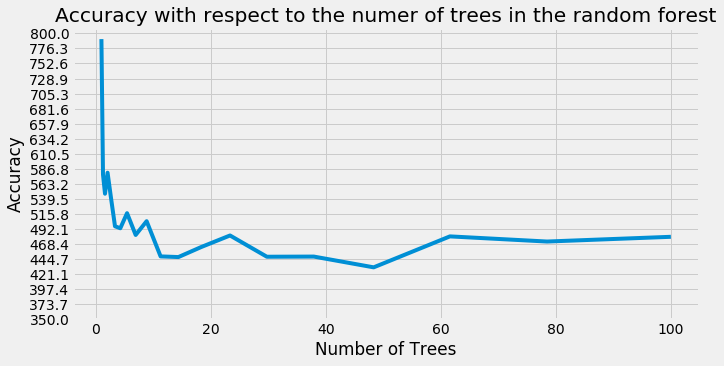

In [42]:
style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,5))
ax0 = fig.add_subplot(111)
ax0.plot(np.logspace(0,2,20),accuracy)
ax0.set_yticks(np.linspace(350,800,20))
ax0.set_title("Accuracy with respect to the numer of trees in the random forest")
ax0.set_xlabel("Number of Trees")
ax0.set_ylabel('Accuracy')
plt.show()

In [43]:
###################################

In [46]:
X = data.drop(['Output'],axis=1)
Y = data['Output']

Random_Forest_model = RandomForestRegressor(n_estimators=10,criterion="mse",min_samples_leaf=8)

accuracy = cross_validate(Random_Forest_model,X,Y,cv=3)['test_score']
accuracy
print('The accuracy is: ',sum(accuracy)/len(accuracy)*100,'%')

The accuracy is:  89.7174298516 %


In [48]:
regression_model = DecisionTreeRegressor(criterion="mse",min_samples_leaf=8) 

regression_model.fit(training_data.iloc[:,:-1],training_data.iloc[:,-1:])
predicted = regression_model.predict(testing_data.iloc[:,:-1])
MSE = np.sum(((testing_data.iloc[:,-1]-predicted)**2)/len(testing_data.iloc[:,-1]))
MSE

48.670408920538016